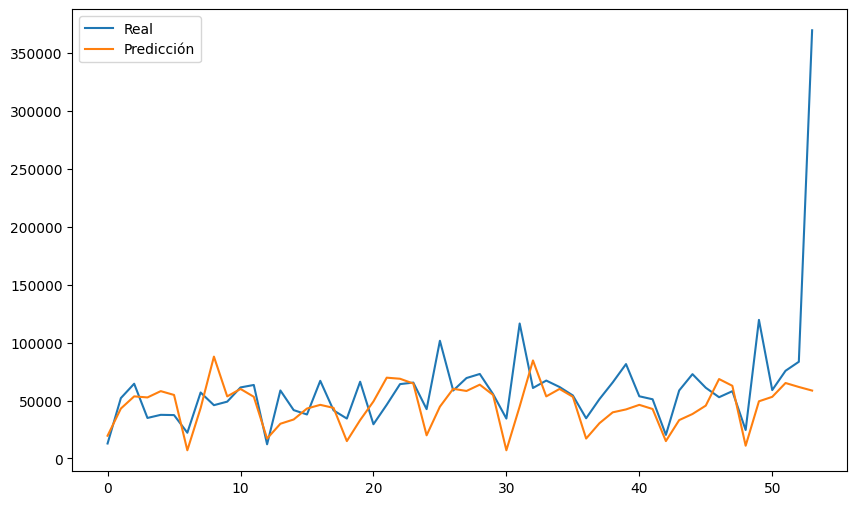

In [2]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Leer el archivo CSV
df_to_train = pd.read_csv("../data/dataset_de_entrenamiento.csv")
df_to_train['Month_sin'] = np.sin(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Month_cos'] = np.cos(2 * np.pi * df_to_train['Month'] / 12)

df_to_train

# Datos de entreamiento
X_to_train = df_to_train[['Year', 'Month', 'Day', 'DayOfWeek', 'Season', 'Month_sin', 'Month_cos']]
X_to_train = pd.get_dummies(X_to_train, columns=['Season'])
Y_to_train = df_to_train['TotalSales']


# fit model
model =  XGBRegressor(
  n_estimators=100,     # Número de árboles
  max_depth=10,         # Profundidad máxima
  learning_rate=0.1,    # Tasa de aprendizaje
  min_child_weight=1,   # Peso mínimo necesario para crear un nodo hijo
  subsample=1,          # Fracción de muestras usadas para entrenar
  colsample_bytree=1,   # Fracción de características usadas por árbol
  random_state=42       # Semilla aleatoria
)
model.fit(X_to_train, Y_to_train)

#### **** ---- Probando el modelo ---- **** ####

# Leer el archivo CSV
df_to_test = pd.read_csv("../data/dataset_de_testing.csv")
df_to_test['Month_sin'] = np.sin(2 * np.pi * df_to_test['Month'] / 12)
df_to_test['Month_cos'] = np.cos(2 * np.pi * df_to_train['Month'] / 12)

# Datos de testing
X_to_test = df_to_test[['Year', 'Month', 'Day', 'DayOfWeek', 'Season', 'Month_sin', 'Month_cos']]
X_to_test = pd.get_dummies(X_to_test, columns=['Season'])
X_to_test['Season_Summer'] = False
X_to_test['Season_Spring'] = False
X_to_test = X_to_test[['Year', 'Month', 'Day', 'DayOfWeek', 'Month_sin', 'Month_cos', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']]
Y_to_test = df_to_test['TotalSales']


# Hacer predicciones
predictions = model.predict(X_to_test)
#print(predictions)
#print(Y_to_test.values)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.plot(Y_to_test.values, label='Real')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.show()